In [399]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests 
#import requests as r
import matplotlib.pyplot as plt

from unicodedata import normalize
from sklearn import utils
from IPython.display import display_html
from matplotlib import pyplot as plt                        
from bs4 import BeautifulSoup
from sklearn import preprocessing, linear_model, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [400]:
# specify url
url = 'https://www.worldometers.info/coronavirus/'

# request html
page = requests.get(url)

# Parse html using BeautifulSoup, you can use a different parser like lxml if present
soup = BeautifulSoup(page.content, 'html.parser')

table =soup.find("table",{"id":"main_table_countries_today"})

In [401]:
display_html(url, raw=True)

https://www.worldometers.info/coronavirus/

In [402]:
soup = BeautifulSoup(page.content, 'html.parser')

table =soup.find("table",{"id":"main_table_countries_today"})
country = list()
total_cases = list()
num = list()
population=list()
table_body=soup.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    #print (cols[2])
    country.append(cols[1])
    total_cases.append(cols[2])
    num.append(cols[4]) 
    population.append(cols[14])

df = pd.DataFrame(country)
df[1] = pd.DataFrame(total_cases)
df[2] = pd.DataFrame(num)
df[3]=pd.DataFrame(population)

df=pd.DataFrame({"country":country,"total_cases":total_cases,"total_deths":num,"population":population})
df.head(20)

,country,total_cases,total_deths,population
0,North America,"123,966,496","1,604,568",
1,Asia,"213,562,226","1,532,885",
2,Europe,"245,295,266","2,010,795",
3,South America,"67,839,149","1,348,631",
4,Oceania,"13,933,569","25,715",
5,Africa,"12,782,593","258,538",
6,,721,15,
7,World,"677,380,020","6,781,147",
8,USA,"104,760,445","1,139,979","334,805,269"
9,India,"44,683,994","530,750","1,406,631,776"


In [403]:
df_org = df.copy()

In [404]:
#tables from wiki 
table_2021 = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_deaths#2021-1st-half-monthly-cumulative-covid-19-deaths',match="monthly cumulative COVID-19 deaths")
table_2020 = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_deaths#2020-monthly-cumulative-covid-19-deaths', match='2020 cumulative COVID-19 deaths on Jan 12 and first day of remaining months')

In [405]:
df_2021 = table_2021[0]
df_2020 = table_2020[0]

In [406]:
df_2020

,Unnamed: 0,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NaN,World,1,259,2982,44045,235789,388314,535852,712811,899393,1066975,1254447,1532840
1,NaN,United States,0,0,1,3155,61347,104900,128182,156284,186292,208253,232295,271235
2,NaN,Brazil,0,0,0,159,5466,28834,58314,91263,120828,142921,159477,172833
3,NaN,India,0,0,0,38,1147,5394,17400,36511,65288,98678,122111,137621
4,NaN,Mexico,0,0,0,28,1732,9779,27121,46000,64158,77163,91289,105655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,Tonga,0,0,0,0,0,0,0,0,0,0,0,0
234,NaN,Turkmenistan,0,0,0,0,0,0,0,0,0,0,0,0
235,NaN,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0
236,NaN,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0


In [407]:
df_2021

,Unnamed: 0,Location,Jan 1,Feb 1,Mar 1
0,NaN,World,5440722,5682684,5954004
1,NaN,United States,819197,881867,941112
2,NaN,Brazil,618984,626854,649134
3,NaN,India,481486,496242,514023
4,NaN,Russia,309707,332012,352446
...,...,...,...,...,...
233,NaN,Tokelau,0,0,0
234,NaN,Tonga,0,0,0
235,NaN,Turkmenistan,0,0,0
236,NaN,Tuvalu,0,0,0


In [408]:
#merge data from diffrent tables
new=list()
for index in df_2021['Location']:
    new.append(df_org[df_org['country'] == index]['population'].values)
df_2021['population']=pd.DataFrame(new)
df_2021 = df_2021[["Location", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Jan'].values)
df_2021['Jan']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Feb'].values)
df_2021['Feb']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Mar'].values)
df_2021['Mar']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Apr'].values)
df_2021['Apr']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['May'].values)
df_2021['May']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Jun'].values)
df_2021['Jun']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Jul'].values)
df_2021['Jul']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Aug'].values)
df_2021['Aug']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Sep'].values)
df_2021['Sep']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Oct'].values)
df_2021['Oct']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Nov'].values)
df_2021['Nov']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov", "Jan 1","Feb 1","Mar 1","population"]]

new=list()
for index in df_2021['Location']:
    new.append(df_2020[df_2020['Location'] == index]['Dec'].values)
df_2021['Dec']=pd.DataFrame(new)
df_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", "Jan 1","Feb 1","Mar 1","population"]]


In [409]:
df_2021

,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan 1,Feb 1,Mar 1,population
0,World,1,259,2982,44045,235789,388314,535852,712811,899393,1066975,1254447,1532840,5440722,5682684,5954004,
1,United States,0,0,1,3155,61347,104900,128182,156284,186292,208253,232295,271235,819197,881867,941112,None
2,Brazil,0,0,0,159,5466,28834,58314,91263,120828,142921,159477,172833,618984,626854,649134,"215,353,593"
3,India,0,0,0,38,1147,5394,17400,36511,65288,98678,122111,137621,481486,496242,514023,"1,406,631,776"
4,Russia,0,0,0,24,1169,4855,9536,14058,17299,20891,28235,40464,309707,332012,352446,"145,805,947"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Tokelau,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,378"
234,Tonga,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"107,749"
235,Turkmenistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
236,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"12,066"


In [410]:
df_2021["last-first"]= (df_2021["Mar 1"]-df_2021["Feb 1"])
df_2021["divide"]=df_2021["last-first"]/15

In [411]:
df_2021.replace('', np.nan)
for i in range(1,237):
    if df_2021['population'][i] == None:
        continue
    else:
        df_2021.loc[df_2021.index[i], 'population'] = df_2021['population'][i].replace(',', '')

       

In [412]:
df_2021['population'] = df_2021['population'].str.replace(',', '')
df_2021['population'] = pd.to_numeric(df_2021['population'])
from numpy import int64
df_2021['population'] = df_2021['population'].fillna(0)
df_2021['population']=df_2021['population'].astype(int64)

In [413]:
df_2021.drop([0,1,2],axis=0,inplace=True)

In [414]:
df_2021['The Increase %'] = (df_2021["last-first"]/df_2021['population'])*100

In [415]:
f_2021 = df_2021[["Location","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",  "Jan 1","Feb 1","Mar 1","last-first","population","divide","The Increase %"]]

<AxesSubplot:xlabel='Location'>

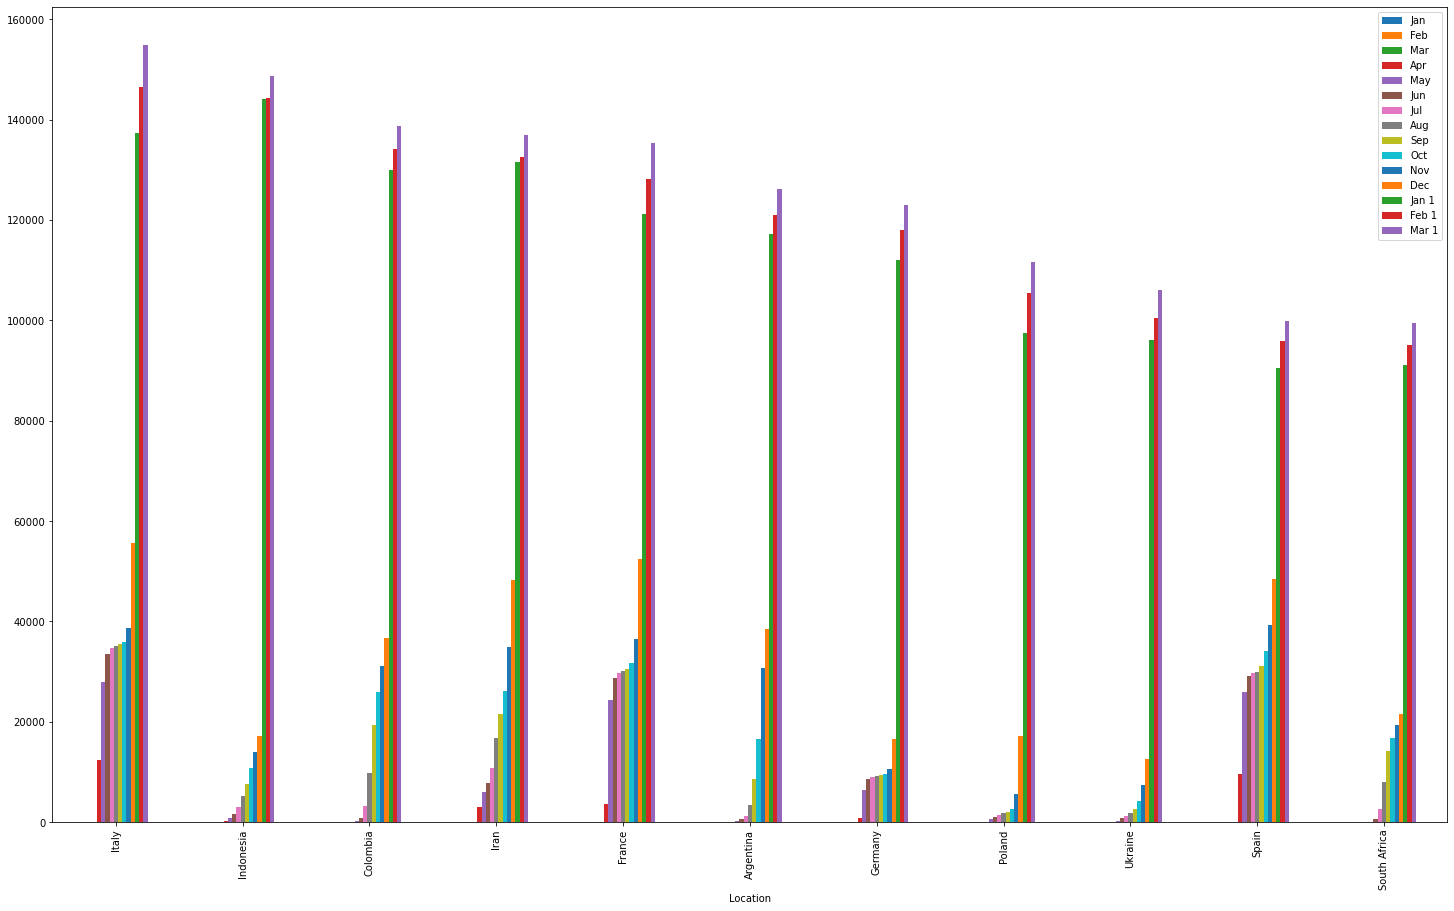

In [416]:
df_copy=df_2021[5:16]
df_copy.plot('Location',["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", "Jan 1","Feb 1","Mar 1"],kind = 'bar',figsize=(25,15))

In [417]:
df_copy_top_5=df_2021.copy()
top_5 = df_copy_top_5.sort_values(by="The Increase %", ascending=False).head(10)

In [418]:
top_5.head(10)

,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan 1,Feb 1,Mar 1,population,last-first,divide,The Increase %
204,Northern Mariana Islands,0,0,0,0,2,2,2,2,2,2,2,2,13,23,30,0,7,0.466667,inf
202,Turks and Caicos Islands,0,0,0,0,1,1,2,2,3,6,6,6,26,34,36,0,2,0.133333,inf
98,Kosovo,0,0,0,1,17,21,41,217,515,615,671,1006,2980,3005,3104,0,99,6.600000,inf
186,Saint Vincent and the Grenadines,0,0,0,0,0,0,0,0,0,0,0,0,83,94,106,0,12,0.800000,inf
185,U.S. Virgin Islands,0,0,0,0,4,6,6,8,14,20,21,23,89,101,109,0,8,0.533333,inf
183,Jersey,0,0,0,2,20,29,31,31,32,32,32,32,89,100,112,0,12,0.800000,inf
25,Czech Republic,0,0,0,35,242,318,347,382,427,675,3604,8607,36324,37347,38750,0,1403,93.533333,inf
182,Central African Republic,0,0,0,0,0,2,47,59,62,62,62,63,101,110,113,0,3,0.200000,inf
194,São Tomé and Príncipe,0,0,0,0,1,10,11,15,15,15,16,17,57,69,72,0,3,0.200000,inf
89,Puerto Rico,0,0,0,8,54,136,153,219,434,661,822,1106,3305,3855,4110,0,255,17.000000,inf


In [419]:
df_2021=df_2021.dropna()

In [420]:
df_2021["Feb 20 - Jan 20"]= (df_2021["Feb"]-df_2021["Jan"])/df_2021['population']
df_2021["Mar 20 - Feb 20"]= (df_2021["Mar"]-df_2021["Feb"])/df_2021['population']
df_2021["Apr 20 - Mar 20"]= (df_2021["Apr"]-df_2021["Mar"])/df_2021['population']
df_2021["May 20 - Apr 20"]= (df_2021["May"]-df_2021["Apr"])/df_2021['population']
df_2021["Jun 20 - May 20"]= (df_2021["Jun"]-df_2021["May"])/df_2021['population']
df_2021["Jul 20 - Jun 20"]= (df_2021["Jul"]-df_2021["Jun"])/df_2021['population']
df_2021["Aug 20 - Jul 20"]= (df_2021["Aug"]-df_2021["Jul"])/df_2021['population']
df_2021["Sep 20 - Aug 20"]= (df_2021["Sep"]-df_2021["Aug"])/df_2021['population']
df_2021["Oct 20 - Sep 20"]= (df_2021["Oct"]-df_2021["Sep"])/df_2021['population']
df_2021["Nov 20 - Oct 20"]= (df_2021["Nov"]-df_2021["Oct"])/df_2021['population']
df_2021["Dec 20 - Nov 20"]= (df_2021["Dec"]-df_2021["Nov"])/df_2021['population']
df_2021["Jan 21 - Dec 20"]= (df_2021["Jan 1"]-df_2021["Dec"])/df_2021['population']
df_2021["Feb 21 - Jan 21"]= (df_2021["Feb 1"]-df_2021["Jan 1"])/df_2021['population']
df_2021["Mar 21 - Feb 21"]= (df_2021["Mar 1"]-df_2021["Feb 1"])/df_2021['population']
column_names = ["Location","Feb 20 - Jan 20","Mar 20 - Feb 20","Apr 20 - Mar 20","May 20 - Apr 20","Jun 20 - May 20","Jul 20 - Jun 20","Aug 20 - Jul 20","Sep 20 - Aug 20","Oct 20 - Sep 20","Nov 20 - Oct 20","Dec 20 - Nov 20","Jan 21 - Dec 20","Feb 21 - Jan 21","Mar 21 - Feb 21"]
df = df_2021.reindex(columns=column_names)
df_org = df.copy()


C:\Users\orits\AppData\Local\Temp\ipykernel_7648\1445023675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["Feb 20 - Jan 20"]= (df_2021["Feb"]-df_2021["Jan"])/df_2021['population']
C:\Users\orits\AppData\Local\Temp\ipykernel_7648\1445023675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["Mar 20 - Feb 20"]= (df_2021["Mar"]-df_2021["Feb"])/df_2021['population']
C:\Users\orits\AppData\Local\Temp\ipykernel_7648\1445023675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [421]:
df_org.drop('Feb 20 - Jan 20',axis=1, inplace=True)
df_org.drop('Mar 20 - Feb 20',axis=1, inplace=True)
df_org.drop('Apr 20 - Mar 20',axis=1, inplace=True)

In [422]:
df_org = df_org.replace([np.inf, -np.inf], 0)
df_org = df_org.replace([np.nan], 0)

In [423]:
df_org

,Location,May 20 - Apr 20,Jun 20 - May 20,Jul 20 - Jun 20,Aug 20 - Jul 20,Sep 20 - Aug 20,Oct 20 - Sep 20,Nov 20 - Oct 20,Dec 20 - Nov 20,Jan 21 - Dec 20,Feb 21 - Jan 21,Mar 21 - Feb 21
3,India,7.884082e-07,0.000003,0.000009,0.000014,0.000020,0.000024,0.000017,0.000011,0.000244,0.000010,0.000013
4,Russia,7.852903e-06,0.000025,0.000032,0.000031,0.000022,0.000025,0.000050,0.000084,0.001847,0.000153,0.000140
5,Mexico,1.295199e-05,0.000061,0.000132,0.000143,0.000138,0.000099,0.000107,0.000109,0.001490,0.000064,0.000061
6,Peru,1.287547e-04,0.000465,0.000516,0.000537,0.000531,0.000260,0.000131,0.000089,0.003355,0.000085,0.000149
7,United Kingdom,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
232,Samoa,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
233,Tokelau,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
234,Tonga,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
236,Tuvalu,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


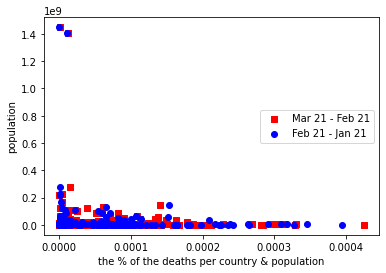

C:\Users\orits\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\orits\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


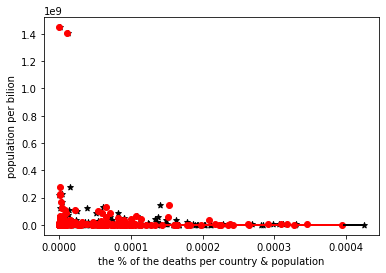

In [424]:
plt.scatter(x=df_org['Mar 21 - Feb 21'],y=df_2021['population'],c='r',marker='s',label='Mar 21 - Feb 21')
plt.scatter(x=df_org['Feb 21 - Jan 21'],y=df_2021['population'],c='b',marker='o',label='Feb 21 - Jan 21')

plt.legend(numpoints=100,loc=7)
plt.xlabel('the % of the deaths per country & population')
plt.ylabel('population')
plt.show()

m=linear_model.LinearRegression().fit(df_org.iloc[:,11:12],df_org.iloc[:,2:11])
plt.scatter(x=df_org['Mar 21 - Feb 21'],y=df_2021['population'],c='k',marker='*',label='Digital')
plt.scatter(x=df_org['Feb 21 - Jan 21'],y=df_2021['population'],c='r',marker='o',label='Digital')

plt.plot(df_org['Mar 21 - Feb 21'],m.predict(df_org.iloc[:,10:11].values.reshape(df_org['Mar 21 - Feb 21'].shape[0],1)),c='k',linewidth=2)
plt.plot(df_org['Feb 21 - Jan 21'],m.predict(df_org.iloc[:,9:10].values.reshape(df_org['Feb 21 - Jan 21'].shape[0],1)),c='r',linewidth=2)

plt.xlabel('the % of the deaths per country & population')
plt.ylabel('population per bilion')
plt.show()

,Location,May 20 - Apr 20,Jun 20 - May 20,Jul 20 - Jun 20,Aug 20 - Jul 20,Sep 20 - Aug 20,Oct 20 - Sep 20,Nov 20 - Oct 20,Dec 20 - Nov 20,Jan 21 - Dec 20,Feb 21 - Jan 21,Mar 21 - Feb 21
94,Trinidad and Tobago,0.000004,0.000000,0.000000,0.000000,0.000010,0.000038,0.000023,0.000009,0.001941,0.000394,3.938617
27,Bulgaria,0.000008,0.000011,0.000013,0.000022,0.000036,0.000029,0.000066,0.000403,0.003933,0.000345,3.452358
195,British Virgin Islands,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001242,0.000327,3.268401


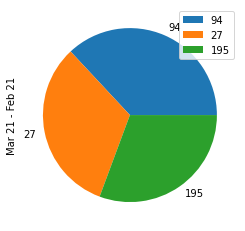

In [425]:
df_copy_top_3=df_org.copy()

df_copy_top_3['Mar 21 - Feb 21'] = df_copy_top_3["Feb 21 - Jan 21"]*10000

top_3 = df_copy_top_3.sort_values(by="Mar 21 - Feb 21", ascending=False).head(3)
top_3.plot(x="2021", y="Mar 21 - Feb 21", kind="pie", rot=200, fontsize=10)
top_3.head(3)

,Location,May 20 - Apr 20,Jun 20 - May 20,Jul 20 - Jun 20,Aug 20 - Jul 20,Sep 20 - Aug 20,Oct 20 - Sep 20,Nov 20 - Oct 20,Dec 20 - Nov 20,Jan 21 - Dec 20,Feb 21 - Jan 21,Mar 21 - Feb 21
195,British Virgin Islands,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001242,0.000327,0.000425
27,Bulgaria,0.000008,0.000011,0.000013,0.000022,0.000036,0.000029,0.000066,0.000403,0.003933,0.000345,0.000331
215,Palau,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000329


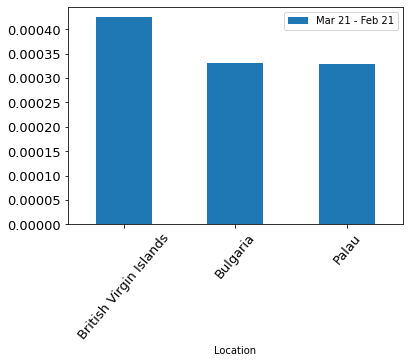

In [426]:
df_copy_top_3=df_org.copy()
top_3 = df_copy_top_3.sort_values(by="Mar 21 - Feb 21", ascending=False).head(3)
top_3.plot(x="Location", y="Mar 21 - Feb 21", kind="bar", rot=50, fontsize=13)
top_3.head(3)

In [427]:
label_column= "Mar 21 - Feb 21"
TRAINING_FEATURES = df_org.columns[df_org.columns != label_column]
TARGET_FEATURE = label_column

X = df_org[TRAINING_FEATURES]
y = df_org[TARGET_FEATURE]

In [428]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [429]:
X_train.drop('Location',axis=1, inplace=True)


In [430]:
X_test.drop('Location',axis=1, inplace=True)

In [431]:
reg = linear_model.LinearRegression(fit_intercept=False)
trained_model=reg.fit(X_train, y_train)

In [432]:
a=trained_model.predict(X_test)

In [433]:
y_pred = pd.Series(a,index=X_test.index)

In [434]:
df1 = pd.DataFrame(data=y_pred.index, columns=['index'])
df2 = pd.DataFrame(data=y_pred.values, columns=['value'])
df_3 = pd.merge(df1, df2, left_index=True, right_index=True)

,index,value
28,15,0.000215
12,67,0.000183
17,8,0.000149


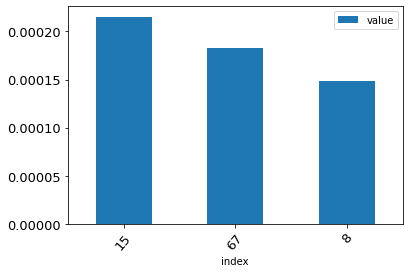

In [435]:
df_copy_top_3=df_3.copy()
df_copy_top_3.drop(index=[0], inplace=True)
top_3 = df_copy_top_3.sort_values(by="value", ascending=False).head(3)
top_3.plot(x="index", y="value", kind="bar", rot=50, fontsize=13)
top_3.head(3)